# Анализ данных и линейная регрессия

Пропущенные значения:
id                            0.0
store_sales(in millions)      0.0
unit_sales(in millions)       0.0
total_children                0.0
num_children_at_home          0.0
avg_cars_at home(approx).1    0.0
gross_weight                  0.0
recyclable_package            0.0
low_fat                       0.0
units_per_case                0.0
store_sqft                    0.0
coffee_bar                    0.0
video_store                   0.0
salad_bar                     0.0
prepared_food                 0.0
florist                       0.0
cost                          0.0
dtype: float64
Статистические показатели:
                  id  store_sales(in millions)  unit_sales(in millions)  \
count  360336.000000             360336.000000            360336.000000   
mean   180167.500000                  6.337376                 3.043881   
std    104020.187637                  3.307980                 0.784676   
min         0.000000                  0.510000            

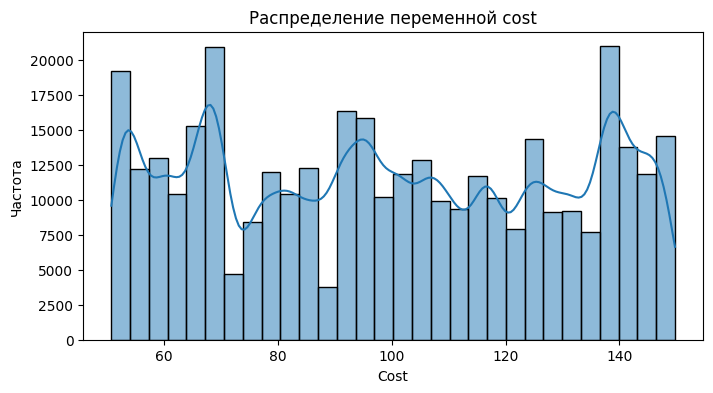

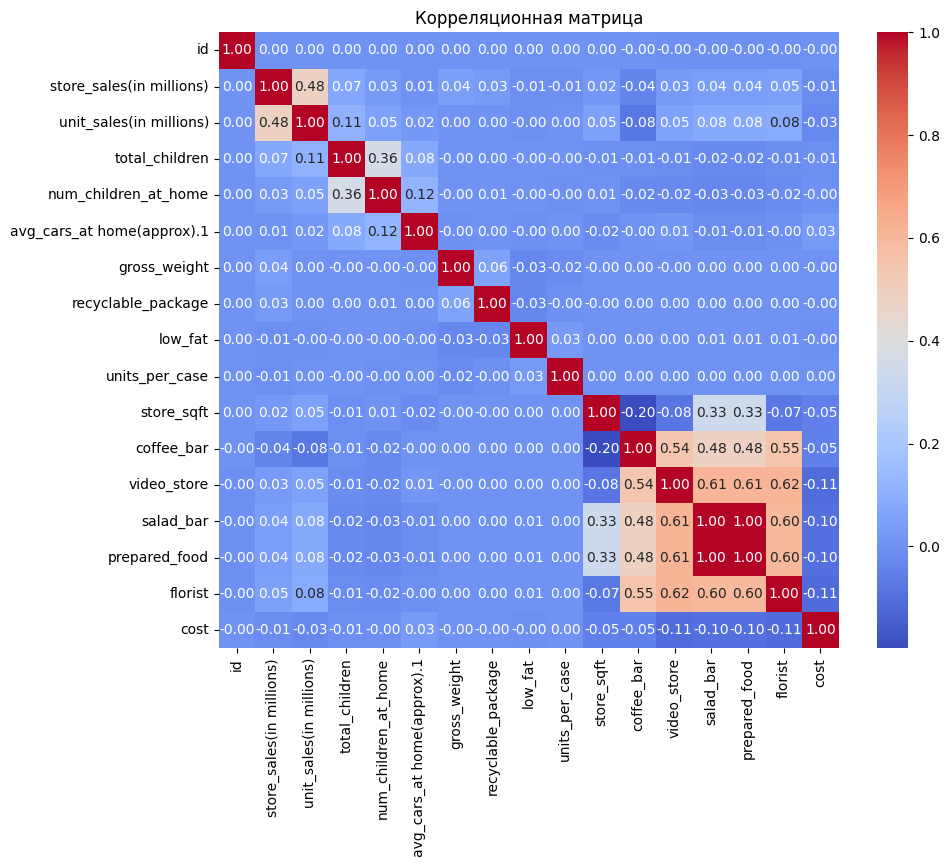

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     350.7
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:21:18   Log-Likelihood:            -1.3860e+06
No. Observations:              288268   AIC:                         2.772e+06
Df Residuals:                  288251   BIC:                         2.772e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

/var/folders/4w/vbk4jcv15kzgrcwpgscbkh2h0000gn/T/ipykernel_7288/1452884827.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="viridis")


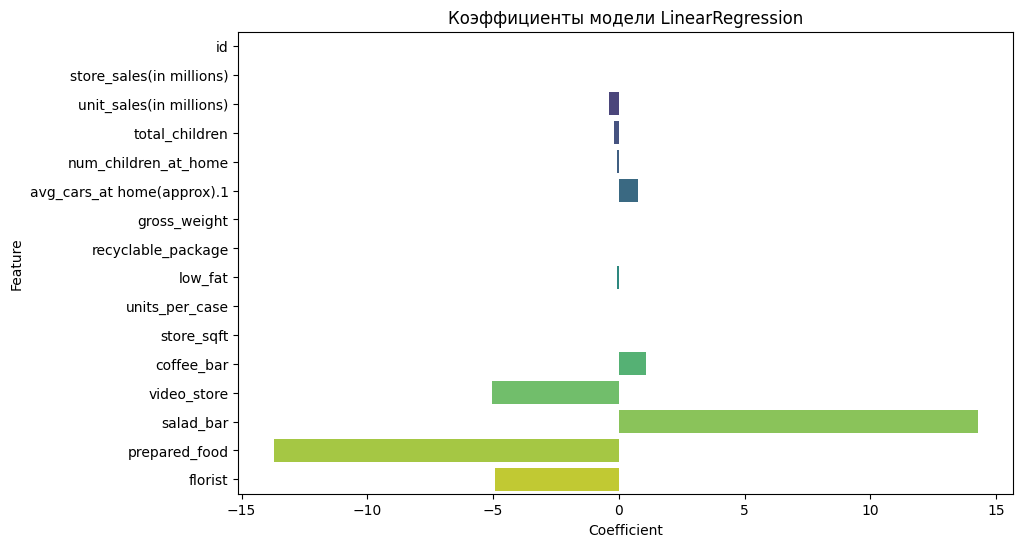

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Загружаем данные
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Исследовательский анализ данных (EDA)
print("Пропущенные значения:")
print(train_df.isnull().mean())

print("Статистические показатели:")
print(train_df.describe())

# Анализ целевой переменной
plt.figure(figsize=(8, 4))
sns.histplot(train_df['cost'], bins=30, kde=True)
plt.title("Распределение переменной cost")
plt.xlabel("Cost")
plt.ylabel("Частота")
plt.show()

# Корреляционная матрица
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

# Подготовка данных
X = train_df.drop(columns=["cost"])
y = train_df["cost"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение OLS модели
X_train_ols = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_ols).fit()
print(ols_model.summary())

# Обучение LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Предсказания и оценка качества
X_test_ols = sm.add_constant(X_test)
y_pred_ols = ols_model.predict(X_test_ols)
y_pred_lr = lr_model.predict(X_test)

print("Метрики OLS:")
print("MAE:", mean_absolute_error(y_test, y_pred_ols))
print("MSE:", mean_squared_error(y_test, y_pred_ols))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ols)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_ols))

print("Метрики LinearRegression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_lr))

# Визуализация коэффициентов
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": lr_model.coef_})
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="viridis")
plt.title("Коэффициенты модели LinearRegression")
plt.show()
